In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from PIL import Image
import numpy as np
import os

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [ ]:


y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

batch_size = 128
num_classes = 10
epochs = 10

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Epoch 1/10
469/469 [==============================] - 27s 56ms/step - loss: 0.2130 - accuracy: 0.9390 - val_loss: 0.0602 - val_accuracy: 0.9803
Epoch 2/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.0378 - val_accuracy: 0.9871
Epoch 3/10
469/469 [==============================] - 23s 49ms/step - loss: 0.0404 - accuracy: 0.9879 - val_loss: 0.0427 - val_accuracy: 0.9857
Epoch 4/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0308 - accuracy: 0.9907 - val_loss: 0.0333 - val_accuracy: 0.9892
Epoch 5/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0232 - accuracy: 0.9932 - val_loss: 0.0297 - val_accuracy: 0.9908
Epoch 6/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0197 - accuracy: 0.9938 - val_loss: 0.0346 - val_accuracy: 0.9885
Epoch 7/10
469/469 [==============================] - 17s 36ms/

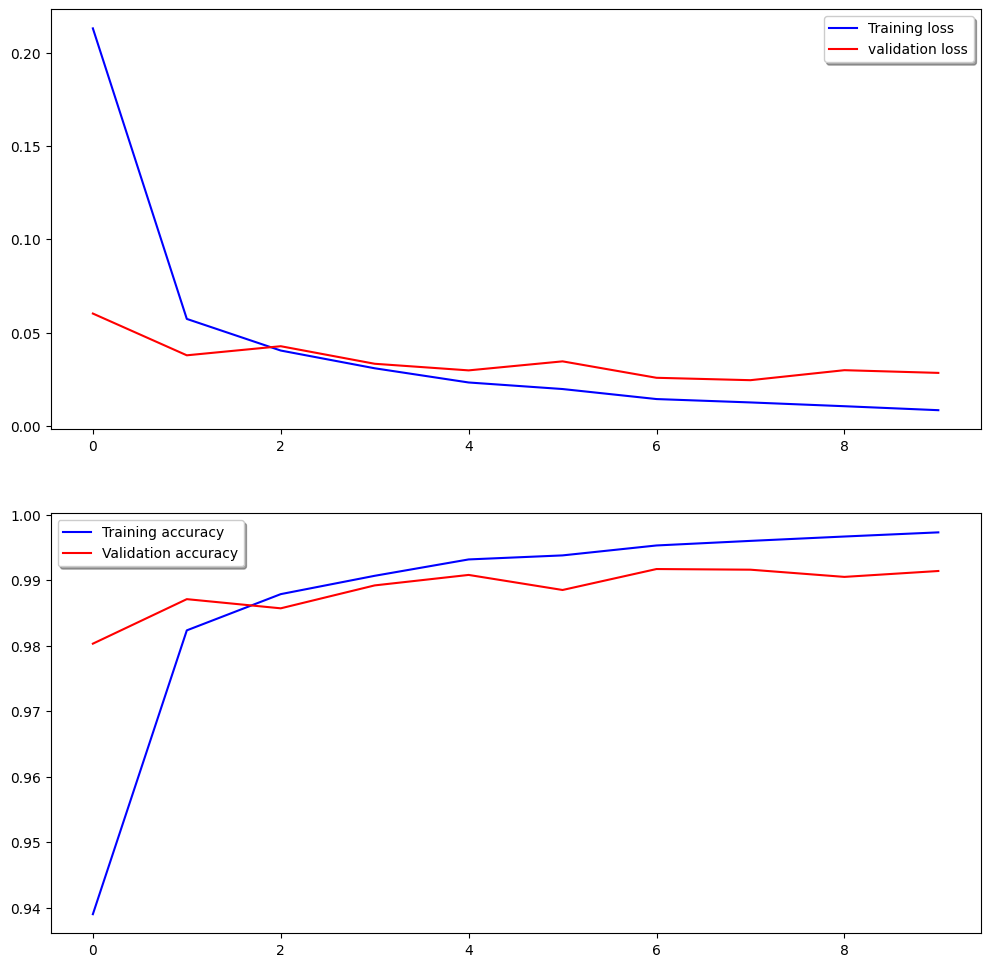

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 12))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

plt.show()

313/313 [==============================] - 1s 3ms/step


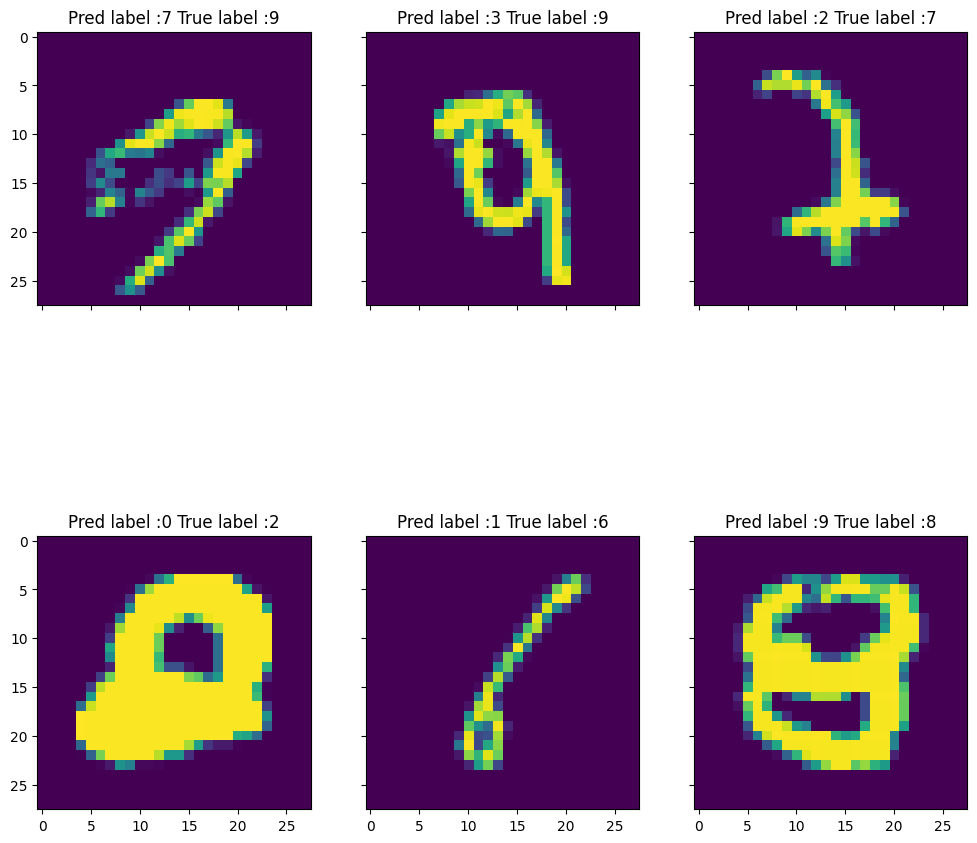

In [ ]:
y_pred = model.predict(x_test)
y_true = np.argmax(y_test, axis = 1)
y_pred_classes = np.argmax(y_pred,axis = 1)
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

def display_errors(errors_index, img_errors, pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True, figsize=(12,12))
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title(f"Pred label :{pred_errors[error]} True label :{obs_errors[error]}")
            n += 1

display_errors(np.random.choice(y_pred_classes_errors.shape[0], 6, replace=False), x_test_errors, y_pred_classes_errors, y_true_errors)